# Introducción
Para abordar esta parte vamos a proceder en varias etapas, empezando por clasificación, continuando con la clasterización y luego avanzando hacia las series temporales.

### Clasificación

La clasificación es un proceso fundamental en el aprendizaje automático, que implica categorizar datos en clases específicas. Cuando hablamos de clasificación binaria, nos referimos a la tarea de asignar observaciones a una de dos categorías distintas. Por ejemplo, en un escenario médico, podríamos clasificar pacientes como diabéticos o no diabéticos.

Para predecir la clase a la que pertenece una observación, se calcula la probabilidad de cada clase posible, representada como un valor entre 0 (imposible) y 1 (cierto). La suma total de las probabilidades para todas las clases es 1, ya que la observación pertenece definitivamente a una de las clases. Por lo tanto, si la probabilidad calculada de que un paciente sea diabético es de 0.3, la probabilidad correspondiente de que no sea diabético sería de 0.7.

Se establece un umbral, comúnmente 0.5, para determinar la clase predicha. Si la probabilidad de que una observación pertenezca a la clase positiva (por ejemplo, diabético) supera este umbral, se predice que la observación pertenece a esa clase.

La evaluación de modelos de clasificación implica medir la precisión del modelo en datos no vistos. La precisión del entrenamiento del modelo es menos importante que su rendimiento con nuevos datos. Por lo tanto, se utilizan métricas como la precisión, el recall y la precisión para evaluar el desempeño del modelo con nuevos datos.

Además, es posible crear modelos de clasificación multiclase, donde hay más de dos clases posibles. Esto se puede abordar utilizando la estrategia de uno contra todos (OVR) o uno contra uno (OVO). Estas estrategias permiten clasificar las observaciones en múltiples clases de manera efectiva.

### Clasterización

La clasterización es un tipo de aprendizaje no supervisado que intenta agrupar los datos en base a sus similitudes. Para esto, primero necesitaremos seleccionar un conjunto de datos adecuado. Vamos a proceder con la ingeniería de variables sobre los datos disponibles, y después aplicaremos varios métodos de clasterización.

Ingeniería de variables (Feature Engineering)

La ingeniería de variables implicará seleccionar o transformar las variables existentes para mejorar el rendimiento del modelo.

Métodos de clasterización

- K-Means, Mean-Shift, y Mini-Batch K-Means: Son técnicas basadas en centroides que intentan minimizar la variación dentro de los clústeres.

- DBSCAN y OPTICS: Métodos de clústering basados en densidad que pueden manejar clústeres de formas irregulares.

- GMM (Gaussian Mixture Models): Clustering basado en la distribución que asume que los datos están distribuidos en una mezcla de distribuciones gaussianas.

- Clustering Jerárquico (Agglomerative Clustering): Construye clústeres paso a paso, ya sea de manera aglomerativa (combinando clústeres) o divisiva (dividiendo clústeres).

### Series Temporales

Modelos de series temporales

- Modelos Estadísticos (AR, ARIMA, SARIMA, Exponential Smoothing): Modelos clásicos para predecir datos de series temporales.

- Recursive Forecasting (Random Forest, Gradient Boosting Regression): Técnicas de machine learning aplicadas a la predicción de series temporales.

- Multivariate Forecasting, Ensemble Modeling: Uso de múltiples variables predictoras para mejorar las predicciones y combinación de varios modelos para obtener resultados más precisos.

# 1. Clasificación

Para abordar la clasificación utilizando los datos de la Champions League, primero debemos definir un problema de clasificación adecuado. Dado que la clasificación requiere un objetivo claro, podríamos, por ejemplo, intentar predecir si un equipo alcanzará cierto nivel de éxito en la competición (como llegar a cuartos de final, semifinales, etc.) basándonos en sus estadísticas de rendimiento durante la fase de grupos o en temporadas anteriores.

Predecir el avance a octavos de final -> problema de clasificación binaria: 1 (Positivo): El equipo avanza a los octavos de final.
0 (Negativo): El equipo no avanza a los octavos de final.

In [1]:
import pandas as pd

In [2]:
grupos_df = pd.read_csv('CSV_RL/grupos_temp_23_24.csv')

grupos_df.head()

,SEASON,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,diferencia_de_goles,puntos
0,2023-2024,Bayern Munich,6,5,1,0,12,6,6,16
1,2023-2024,FC Copenhagen,6,2,2,2,8,8,0,8
2,2023-2024,Galatasaray,6,1,2,3,10,13,-3,5
3,2023-2024,Manchester Utd,6,1,1,4,12,15,-3,4
4,2023-2024,Arsenal,6,4,1,1,16,4,12,13


In [3]:
octavos_df = pd.read_csv('CSV_RL/octavos_temp_23_24.csv')

octavos_df.head()

,SEASON,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,puntos
0,2023-2024,Manchester City,7,7,0,0,21,8,21
1,2023-2024,Real Madrid,7,7,0,0,17,7,21
2,2023-2024,Bayern Munich,7,5,1,1,12,7,16
3,2023-2024,Porto,7,5,0,2,16,8,15
4,2023-2024,Inter,7,4,3,0,9,5,15


In [8]:
equipos_octavos = octavos_df['equipo'].unique()
grupos_df['Avanzo_a_Octavos'] = grupos_df['equipo'].apply(lambda x: 1 if x in equipos_octavos else 0)

caracteristicas = ['equipo', 'p_jugados', 'p_ganados', 'p_empatados', 'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'diferencia_de_goles', 'puntos']
etiqueta = 'Avanzo_a_Octavos'
grupos_df[caracteristicas + [etiqueta]].head(8)


,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,diferencia_de_goles,puntos,Avanzo_a_Octavos
0,Bayern Munich,6,5,1,0,12,6,6,16,1
1,FC Copenhagen,6,2,2,2,8,8,0,8,1
2,Galatasaray,6,1,2,3,10,13,-3,5,0
3,Manchester Utd,6,1,1,4,12,15,-3,4,0
4,Arsenal,6,4,1,1,16,4,12,13,1
5,PSV Eindhoven,6,2,3,1,8,10,-2,9,1
6,Lens,6,2,2,2,6,11,-5,8,0
7,Sevilla,6,0,2,4,7,12,-5,2,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(grupos_df[caracteristicas], grupos_df[etiqueta], test_size=0.3, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)

precision = precision_score(y_test, predicciones)
recall = recall_score(y_test, predicciones)
f1 = f1_score(y_test, predicciones)
accuracy = accuracy_score(y_test, predicciones)

precision, recall, f1, accuracy

(0.8888888888888888, 1.0, 0.9411764705882353, 0.9)

- Precisión: 88.89% (88.89% de las predicciones para equipos que avanzan a octavos son correctas)

- Recall (Sensibilidad): 100% (significa que el modelo identificó correctamente a todos los equipos que realmente avanzaron a octavos)

- F1-Score: 94.12% (promedio armónico de la precisión y el recall: sugiere un equilibrio muy bueno entre estas dos métricas con un 94.12%)

- Exactitud: 90% (la gran mayoría de sus predicciones, tanto de equipos que avanzan como de los que no, son correctas)

# 2. Clasterización

In [9]:
todos_df = pd.read_csv('CSV_RL/todos.csv')

todos_df.head()

,SEASON,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,puntos
0,2016-2017,Atlético Madrid,12,8,2,2,15,9,26
1,2016-2017,FC Basel,6,0,2,4,3,12,2
2,2016-2017,PFC Ludogorets Razgrad,6,0,3,3,6,15,3
3,2016-2017,Paris Saint-Germain,8,4,3,1,18,13,15
4,2016-2017,Arsenal FC,8,4,2,2,20,16,14


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

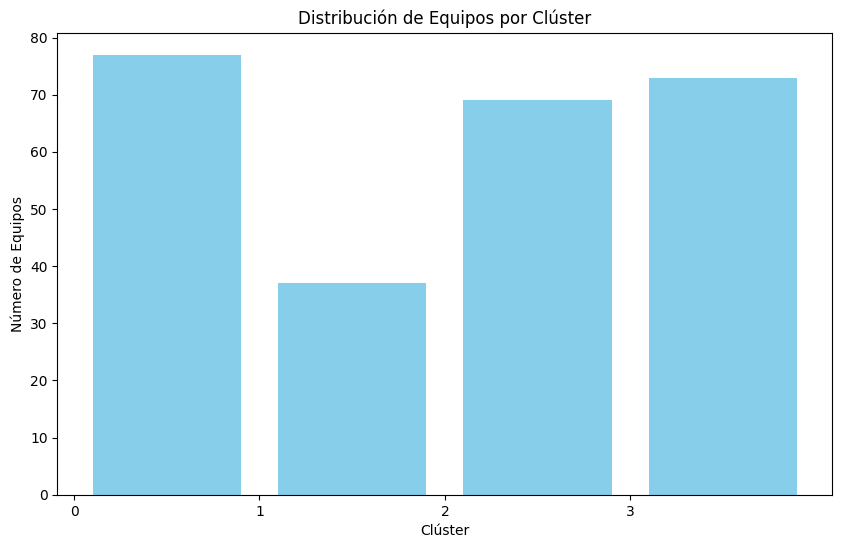

,SEASON,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,puntos,Cluster
0,2016-2017,Atlético Madrid,12,8,2,2,15,9,26,1
1,2016-2017,FC Basel,6,0,2,4,3,12,2,0
2,2016-2017,PFC Ludogorets Razgrad,6,0,3,3,6,15,3,2
3,2016-2017,Paris Saint-Germain,8,4,3,1,18,13,15,3
4,2016-2017,Arsenal FC,8,4,2,2,20,16,14,3
...,...,...,...,...,...,...,...,...,...,...
251,2023-2024,Barcelona,7,4,1,2,13,7,13,3
252,2023-2024,Porto,7,5,0,2,16,8,15,3
253,2023-2024,Shakhtar,6,3,0,3,10,12,9,0
254,2023-2024,Atlético Madrid,7,4,2,1,17,7,14,3


In [12]:
variables_clustering = ['p_jugados', 'p_ganados', 'p_empatados', 'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']

scaler = StandardScaler()
data_normalized = scaler.fit_transform(todos_df[variables_clustering])
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

todos_df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
plt.hist(clusters, bins=range(5), rwidth=0.8, color='skyblue')
plt.title('Distribución de Equipos por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Número de Equipos')
plt.xticks(range(4))
plt.show()

todos_df

Actualizamos información ya que ya se sabe la organización de los cuartos de final

In [1]:
import pandas as pd

resultados_ida = {
    "Porto": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
    "Arsenal": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "Napoli": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Barcelona": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "PSG": {"resultado": "victoria", "goles_favor": 2, "goles_contra": 0},
    "Real Sociedad": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 2},
    "Inter": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
    "Atlético Madrid": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "PSV Eindhoven": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Dortmund": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Lazio": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
    "Bayern Munich": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "FC Copenhagen": {"resultado": "derrota", "goles_favor": 1, "goles_contra": 3},
    "Manchester City": {"resultado": "victoria", "goles_favor": 3, "goles_contra": 1},
    "RB Leipzig": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "Real Madrid": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
}
resultados_vuelta = {
    "Paris": {"resultado": "derrota", "goles_favor": 1, "goles_contra": 2},
    "Real Sociedad": {"resultado": "derrota", "goles_favor": 1, "goles_contra": 4},
    "Lazio": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 3},
    "Bayern": {"resultado": "victoria", "goles_favor": 3, "goles_contra": 0},
    "Copenhague": {"resultado": "derrota", "goles_favor": 1, "goles_contra": 3},
    "Man City": {"resultado": "victoria", "goles_favor": 3, "goles_contra": 1},
    "Leipzig": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Real Madrid": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Oporto": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
    "Arsenal": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0, "penales": {"resultado": "victoria", "goles_favor": 4, "goles_contra": 2}},
    "Nápoles": {"resultado": "derrota", "goles_favor": 1, "goles_contra": 3},
    "Barcelona": {"resultado": "victoria", "goles_favor": 3, "goles_contra": 1},
    "Inter": {"resultado": "derrota", "goles_favor": 1, "goles_contra": 2, "penales": {"resultado": "derrota", "goles_favor": 2, "goles_contra": 4}},
    "Atlético Madrid": {"resultado": "victoria", "goles_favor": 2, "goles_contra": 1, "penales": {"resultado": "victoria", "goles_favor": 4, "goles_contra": 2}},
    "PSV Eindhoven": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 2},
    "Dortmund": {"resultado": "victoria", "goles_favor": 2, "goles_contra": 0},
}

cuartos_de_final = {
    "ida": {
        "9 de abril": {
            "Arsenal-Bayern": {"hora": "21:00 HEC", "goles_favor_arsenal": None, "goles_contra_arsenal": None, "goles_favor_bayern": None, "goles_contra_bayern": None},
            "Real Madrid-Manchester City": {"hora": "21:00 HEC", "goles_favor_real_madrid": None, "goles_contra_real_madrid": None, "goles_favor_manchester_city": None, "goles_contra_manchester_city": None}
        },
        "10 de abril": {
            "Atlético de Madrid-Dortmund": {"hora": "21:00 HEC", "goles_favor_atletico_madrid": None, "goles_contra_atletico_madrid": None, "goles_favor_dortmund": None, "goles_contra_dortmund": None},
            "Paris-Barcelona": {"hora": "21:00 HEC", "goles_favor_paris": None, "goles_contra_paris": None, "goles_favor_barcelona": None, "goles_contra_barcelona": None}
        }
    },
    "vuelta": {
        "16 de abril": {
            "Dortmund-Atlético de Madrid": {"hora": "21:00 HEC", "goles_favor_dortmund": None, "goles_contra_dortmund": None, "goles_favor_atletico_madrid": None, "goles_contra_atletico_madrid": None},
            "Barcelona-Paris": {"hora": "21:00 HEC", "goles_favor_barcelona": None, "goles_contra_barcelona": None, "goles_favor_paris": None, "goles_contra_paris": None}
        },
        "17 de abril": {
            "Bayern-Arsenal": {"hora": "21:00 HEC", "goles_favor_bayern": None, "goles_contra_bayern": None, "goles_favor_arsenal": None, "goles_contra_arsenal": None},
            "Manchester City-Real Madrid": {"hora": "21:00 HEC", "goles_favor_manchester_city": None, "goles_contra_manchester_city": None, "goles_favor_real_madrid": None, "goles_contra_real_madrid": None}
        }
    }
}




In [ ]:
# Convertir los diccionarios en DataFrames
df_ida = pd.DataFrame.from_dict(resultados_ida, orient='index').reset_index()
df_vuelta = pd.DataFrame.from_dict(resultados_vuelta, orient='index').reset_index()

# Renombrar la columna 'index' a 'Equipo'
df_ida.rename(columns={'index': 'Equipo'}, inplace=True)
df_vuelta.rename(columns={'index': 'Equipo'}, inplace=True)

# Combinar los DataFrames de ida y vuelta
df_octavos = pd.merge(df_ida, df_vuelta, on='Equipo', suffixes=('_ida', '_vuelta'))

# Guardar el DataFrame en un archivo CSV
df_octavos.to_csv('resultados_octavos.csv', index=False)

# ESTUDIO RENDIMIENTO REAL MADRID